In [2]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 85.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import wfdb  # PhysioNet waveform database package

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the subject-info.csv file
csv_file = 'subject-info.csv'  # Replace with the correct path to your CSV file

# Read the CSV file into a DataFrame
try:
    subject_info_clean = subject_info.dropna()
except Exception as e:
    print(f"An error occurred: {e}")


In [25]:
subject_info_clean.head()

,ID,Gender,Age [years],Height [cm],Weight [kg],Ear/finger,Motion,Blood pressure [mmHg],Glycaemia [mmol/l],SpO2 [%]
48,112001,M,43,180.0,76,0,0,137/94,5.8,97.0
49,112002,M,43,180.0,76,0,0,137/94,5.8,98.0
50,112003,M,43,180.0,76,0,0,137/94,5.8,98.0
51,112004,M,43,180.0,76,0,0,137/94,5.8,97.0
52,112005,M,43,180.0,76,0,0,137/94,5.8,97.0


        ID Gender  Age [years]  Height [cm]  Weight [kg]  Ear/finger Motion  \
48  112001      M           43        180.0           76           0      0   
49  112002      M           43        180.0           76           0      0   
50  112003      M           43        180.0           76           0      0   
51  112004      M           43        180.0           76           0      0   
52  112005      M           43        180.0           76           0      0   

   Blood pressure [mmHg]  Glycaemia [mmol/l]  SpO2 [%]  
48                137/94                 5.8      97.0  
49                137/94                 5.8      98.0  
50                137/94                 5.8      98.0  
51                137/94                 5.8      97.0  
52                137/94                 5.8      97.0  


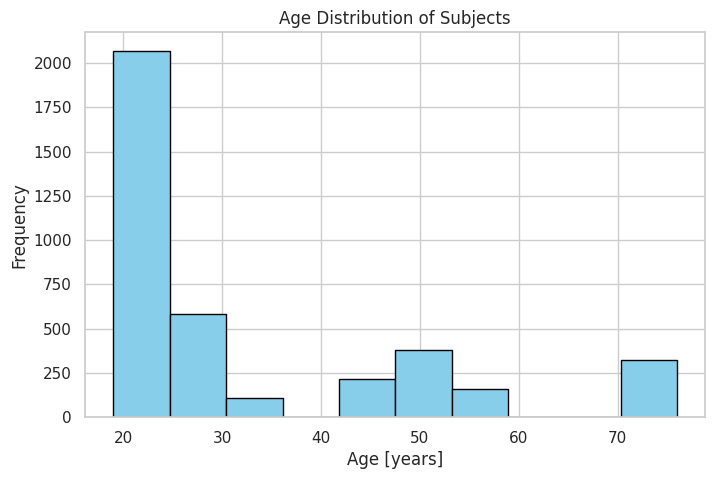

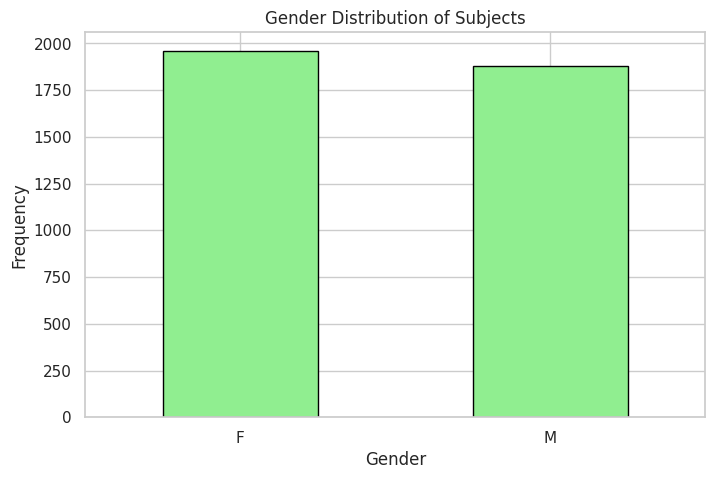

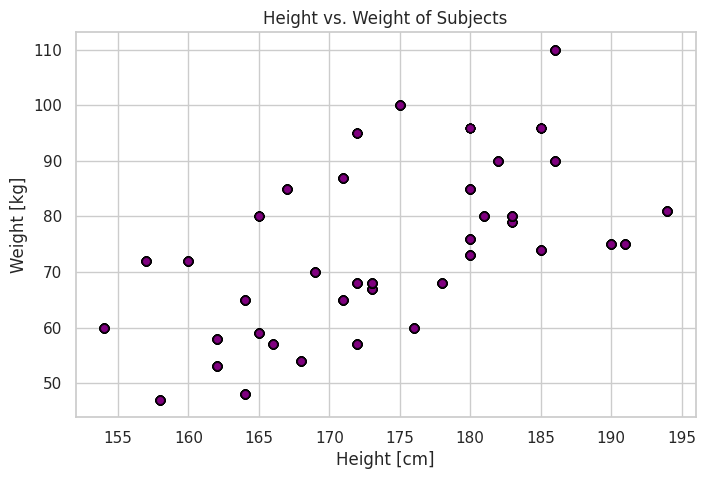

<ipython-input-20-dc44bfea53df>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject_info_clean[['Systolic BP', 'Diastolic BP']] = subject_info_clean['Blood pressure [mmHg]'].str.split('/', expand=True)
<ipython-input-20-dc44bfea53df>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject_info_clean[['Systolic BP', 'Diastolic BP']] = subject_info_clean['Blood pressure [mmHg]'].str.split('/', expand=True)
<ipython-input-20-dc44bfea53df>:41: SettingWithCopyWarning: 
A value is trying to be set on a co

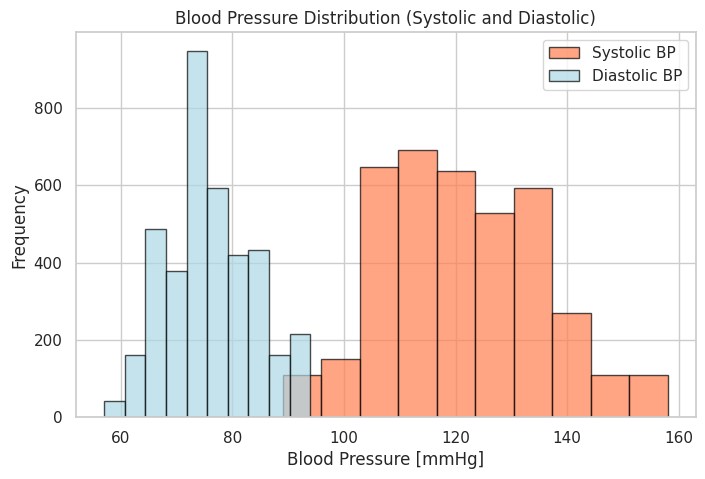

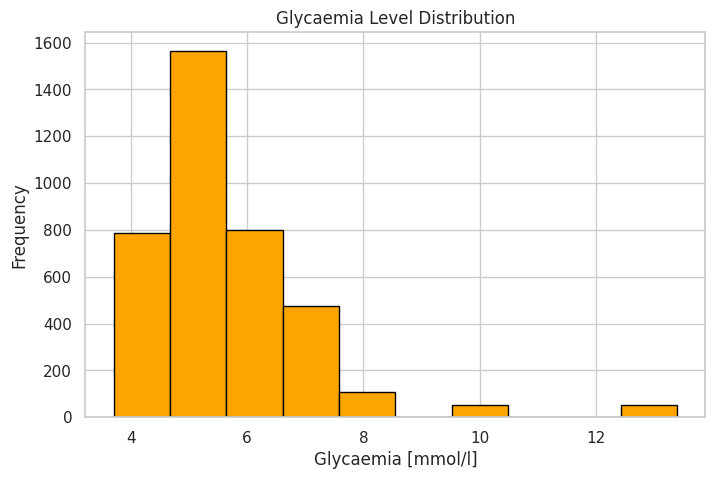

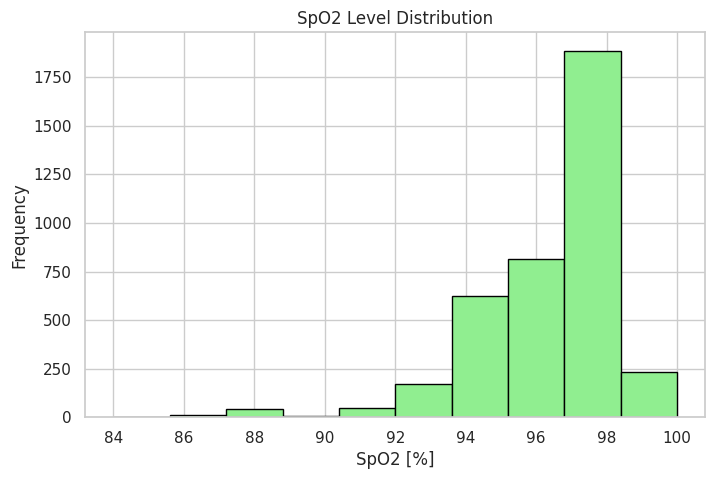

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the cleaned DataFrame is 'subject_info_clean'
# Display the first few rows to understand the structure
print(subject_info_clean.head())

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Age Distribution (Histogram)
plt.figure(figsize=(8, 5))
plt.hist(subject_info_clean['Age [years]'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Subjects')
plt.xlabel('Age [years]')
plt.ylabel('Frequency')
plt.show()

# 2. Gender Distribution (Bar chart)
plt.figure(figsize=(8, 5))
gender_counts = subject_info_clean['Gender'].value_counts()
gender_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Gender Distribution of Subjects')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# 3. Height vs. Weight (Scatter plot)
plt.figure(figsize=(8, 5))
plt.scatter(subject_info_clean['Height [cm]'], subject_info_clean['Weight [kg]'], color='purple', edgecolor='black', alpha=0.7)
plt.title('Height vs. Weight of Subjects')
plt.xlabel('Height [cm]')
plt.ylabel('Weight [kg]')
plt.show()

# 4. Blood Pressure Distribution (Bar chart for systolic and diastolic values)
# We'll first split the "Blood pressure" column into systolic and diastolic
subject_info_clean[['Systolic BP', 'Diastolic BP']] = subject_info_clean['Blood pressure [mmHg]'].str.split('/', expand=True)
subject_info_clean['Systolic BP'] = pd.to_numeric(subject_info_clean['Systolic BP'])
subject_info_clean['Diastolic BP'] = pd.to_numeric(subject_info_clean['Diastolic BP'])

# Plotting Blood Pressure Distribution
plt.figure(figsize=(8, 5))
plt.hist(subject_info_clean['Systolic BP'], bins=10, alpha=0.7, label='Systolic BP', color='coral', edgecolor='black')
plt.hist(subject_info_clean['Diastolic BP'], bins=10, alpha=0.7, label='Diastolic BP', color='lightblue', edgecolor='black')
plt.title('Blood Pressure Distribution (Systolic and Diastolic)')
plt.xlabel('Blood Pressure [mmHg]')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 5. Glycaemia Distribution (Histogram)
plt.figure(figsize=(8, 5))
plt.hist(subject_info_clean['Glycaemia [mmol/l]'], bins=10, color='orange', edgecolor='black')
plt.title('Glycaemia Level Distribution')
plt.xlabel('Glycaemia [mmol/l]')
plt.ylabel('Frequency')
plt.show()

# 6. SpO2 Distribution (Histogram)
plt.figure(figsize=(8, 5))
plt.hist(subject_info_clean['SpO2 [%]'], bins=10, color='lightgreen', edgecolor='black')
plt.title('SpO2 Level Distribution')
plt.xlabel('SpO2 [%]')
plt.ylabel('Frequency')
plt.show()


In [27]:
import pandas as pd

# Load the CSV file
csv_file = 'quality-hr-ann.csv'  # Replace with the actual path if needed

try:
    df = pd.read_csv(csv_file)
except Exception as e:
    print(f"An error occurred: {e}")


In [28]:
df.head()

,ID,Quality,HR
0,100001,1,83
1,100002,1,85
2,100003,1,81
3,100004,0,85
4,101001,1,67
